Say we have a text file called "photodiode.txt" that contains the following columns of data:

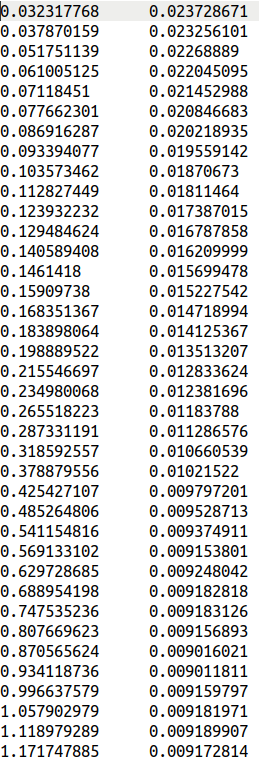

We would like to fit this to an exponential decay function $f(t) = a \, e^{-t/\tau} + b$, and extract the fit parameters.

Fit parameters

	 0.019725530088686587 	 +/- 0.0002916100836642844
	 0.1403376679307522 	 +/- 0.0036767217666443495
	 0.008976295289106656 	 +/- 9.739881107229989e-05


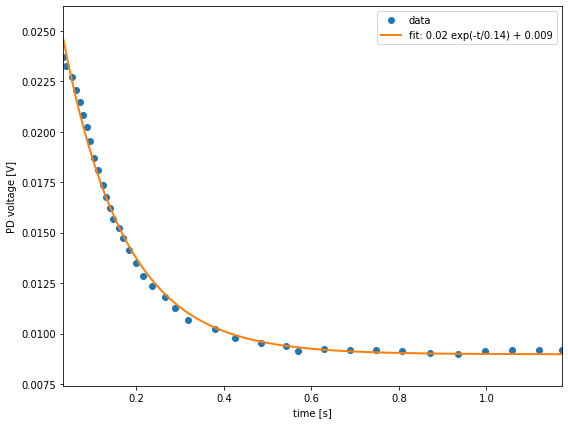

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit   # curve_fit is a nonlinear least-squares fit routine

def f(t,a,tau,b):    # fit function
    return a*np.exp(-t/tau) + b

t,y = np.loadtxt("photodiode.txt",unpack=True)

p0 = [0.2,0.5,0.2]    # initial guesses for the fit parameters a, tau & b

popt,pcov = curve_fit(f,t,y,p0=p0)   

# popt contains the best fit parameters
# pcov is the "covariance matrix" which contains information about the fit uncertainties
a,tau,b = popt
delta_a, delta_tau, delta_b = [np.sqrt(pcov[i,i]) for i in range(len(popt))]

print("Fit parameters",end='\n\n')
for i in range(len(popt)):
    print(f"\t {popt[i]} \t +/- {np.sqrt(pcov[i,i])}")

# # if the data includes y error bars in an array 'yerr', you can calculate the reduced chi-squared to quantify the goodness of the fit
# residuals = y - f(t,*popt)
# wssr = np.sum(residuals**2/yerr**2)    # weighted sum of squares of residuals
# ndof = len(y) - len(popt)              # number of degrees of freedom
# chi_squared = wssr/ndof                # definition of chi_squared

# plot
tnew = np.linspace(t.min(),t.max(),1000) # denser coverage along x-axis to get a smoother fit line

fig,ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("time [s]")
ax.set_ylabel("PD voltage [V]")
ax.plot(t,y,'o',label="data")
ax.plot(tnew,f(tnew,*popt),lw=2,label=f"fit: {a:.2} exp(-t/{tau:.3}) + {b:.2}")
ax.legend()
plt.margins(0,0.1)
plt.tight_layout()
plt.show()